In [1]:
import os
os.getcwd()

'C:\\Users\\VANSHITA JAIN'

In [2]:
#import basic library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#to load dataset
df=pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#how many rows and column
df.shape

(303, 14)

In [6]:
# here, target is the output column
df["target"].unique()
#here, we have binary classifier means we ave 2 classes in outputcolumn
#0 means no
#1 means yes

array([1, 0])

In [7]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

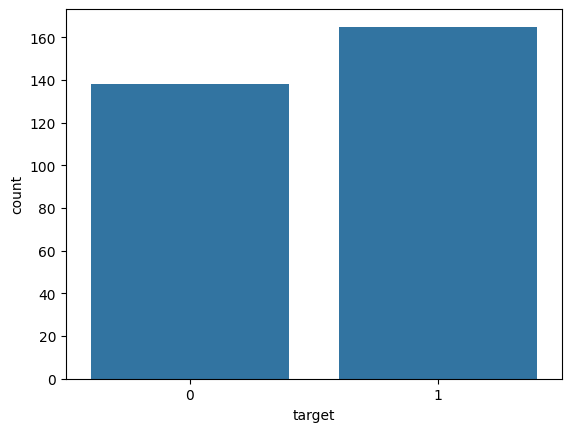

In [8]:
sns.countplot(data=df,x="target")
plt.show()

In [9]:
#EDA : 
#1st step : check null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

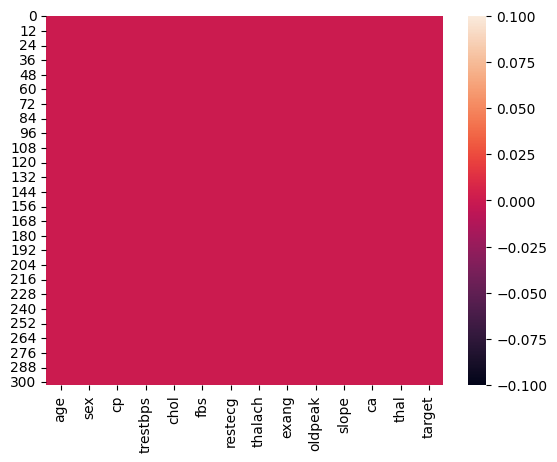

In [10]:
#visualize
sns.heatmap(df.isnull())
plt.show()

In [11]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
#check duplicate rows
df.duplicated().sum()

np.int64(1)

In [13]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
X=df.drop("target",axis=1) #input select
Y=df["target"]

In [17]:
#train-test-split
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [19]:
X_train.shape,X_test.shape

((211, 13), (91, 13))

In [20]:
Y_train.shape,Y_test.shape

((211,), (91,))

In [21]:
#2. scaling
from sklearn.preprocessing import StandardScaler

In [22]:
#obj for StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [23]:
X_train

array([[-1.06167727, -1.55023411,  1.02938967, ..., -0.69616283,
         0.27995117, -0.51005185],
       [ 0.43317242,  0.64506386, -0.92737808, ...,  0.95429062,
        -0.72123014,  1.12056846],
       [ 0.43317242, -1.55023411, -0.92737808, ..., -0.69616283,
         1.28113248, -2.14067216],
       ...,
       [-2.66330193,  0.64506386,  0.05100579, ...,  0.95429062,
        -0.72123014, -0.51005185],
       [ 0.43317242,  0.64506386, -0.92737808, ...,  0.95429062,
         1.28113248,  1.12056846],
       [ 0.00607251,  0.64506386,  1.02938967, ...,  0.95429062,
        -0.72123014,  1.12056846]])

In [24]:
#create a user defined function
def create_model(model):
    
    #train the model with 70% training model
    model.fit(X_train,Y_train)
    
    #test the model with 30% data
    Y_pred=model.predict(X_test)
    
    #create confusion matrix
    print(confusion_matrix(Y_test,Y_pred))
    
    #generate classifier matrix
    print(classification_report(Y_test,Y_pred))
    return model

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
#model with logistic regression class
from sklearn.linear_model import LogisticRegression

In [27]:
#create obj for LogisticRegression
lr=LogisticRegression()

In [28]:
#call function
lr=create_model(lr)

[[30  8]
 [ 9 44]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        38
           1       0.85      0.83      0.84        53

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [29]:
#here, accuracy  =0.81 means 81% : good but not best
#recall score (1)=0.83 means 83% : good but not best (try score above 90-95%)

#reasin behind less score, model is overfit
#because logistic regression does not select input features automatic to predict the output

In [67]:
#use another classifier : DecisionTree class
#call DecisonTreeClassifier with gini index
from sklearn.tree import DecisionTreeClassifier

In [68]:
#create obj
dt=DecisionTreeClassifier(random_state=1) #by default criterion="gini"

In [69]:
dt=create_model(dt)

[[30  8]
 [16 37]]
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        38
           1       0.82      0.70      0.76        53

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.73        91
weighted avg       0.75      0.74      0.74        91



In [33]:
#check information of inputs
dt.feature_importances_

array([0.08516705, 0.02033896, 0.31733755, 0.04568138, 0.11352945,
       0.        , 0.        , 0.07328742, 0.08138672, 0.06144397,
       0.        , 0.11329479, 0.0885327 ])

In [34]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [35]:
dict={'Input column':X.columns,'Information gain':dt.feature_importances_}
#converts into dataframe
df1=pd.DataFrame(dict)
df1.sort_values("Information gain",ascending=False,ignore_index=True)

,Input column,Information gain
0,cp,0.317338
1,chol,0.113529
2,ca,0.113295
3,thal,0.088533
4,age,0.085167
5,exang,0.081387
6,thalach,0.073287
7,oldpeak,0.061444
8,trestbps,0.045681
9,sex,0.020339


In [36]:
#Accuracy = 0.74 means 74% and recall=70%
#reason for less accuracy : model is overfit

In [70]:
#decisiontree using entropy
df=DecisionTreeClassifier(random_state=1,criterion="entropy")

In [71]:
#call function
dt=create_model(dt)

[[30  8]
 [16 37]]
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        38
           1       0.82      0.70      0.76        53

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.73        91
weighted avg       0.75      0.74      0.74        91



In [72]:
dict={'Input column':X.columns,'Information gain':dt.feature_importances_}
#converts into dataframe
df1=pd.DataFrame(dict)
df1.sort_values("Information gain",ascending=False,ignore_index=True)

,Input column,Information gain
0,cp,0.317338
1,chol,0.113529
2,ca,0.113295
3,thal,0.088533
4,age,0.085167
5,exang,0.081387
6,thalach,0.073287
7,oldpeak,0.061444
8,trestbps,0.045681
9,sex,0.020339


In [40]:
#decision tree with entropy
#less accuracy : 0.70 means 70%
#recall : 1 : 0.72 means 72% which is less

#reason behind less score : model is overfit
#to reduce overfitting of model , use pruning technique of DecisionTree
#there are 2 types of pruning technique of DecisionTree
#1. max_depth : inbuilt parameter of DecisionTree
#2. min_samples_leaf : inbuilt parameter of DecisionTree

In [41]:
#max_depth : max_depth should be <= 8
'''
for i in range(1,9):  #start=1,stop=9-1=8 step=+1
    #create the object for DecisionTreeClassifier class and passing the value of 
    #max_depth=i 
    dt=DecisionTreeClassifier(random_state=1,max_depth=i)  #bydefault gini index
    print("Max depth : ",i)
    #call the function and passing the object of DecisionTreeClassifier class
    dt=create_model(dt)
'''
#create the object for DecisionTreeClassifier class and passing the value of 
#max_depth=4
dt=DecisionTreeClassifier(random_state=1,max_depth=4)  #bydefault gini index

#call the function and passing the object of DecisionTreeClassifier class
dt=create_model(dt)

[[25 13]
 [12 41]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67        38
           1       0.76      0.77      0.77        53

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.72      0.73      0.72        91



In [42]:
dict={'Input column':X.columns,'Information gain':dt.feature_importances_}
#converts into dataframe
df1=pd.DataFrame(dict)
df1.sort_values("Information gain",ascending=False,ignore_index=True)

,Input column,Information gain
0,cp,0.423542
1,ca,0.131387
2,exang,0.108625
3,oldpeak,0.069322
4,chol,0.064696
5,age,0.057903
6,thal,0.056849
7,thalach,0.042015
8,sex,0.027146
9,trestbps,0.018516


In [43]:
#accuracy = 73% and recall = 77% (1) : DecisionTree with gini index : use max_depth

In [44]:
#DecisionTree with entropy : use max_depth
'''
for i in range(1,9):
    #create the object for DecisionTreeClassifier class and passing the value of 
    #max_depth=i and criterion="entropy"
    dt=DecisionTreeClassifier(random_state=1,max_depth=i,criterion="entropy")  #bydefault gini index
    print("Max depth : ",i)
    #call the function and passing the object of DecisionTreeClassifier class
    dt=create_model(dt)
'''
#create the object for DecisionTreeClassifier class and passing the value of 
#max_depth=i and criterion="entropy"
dt=DecisionTreeClassifier(random_state=1,max_depth=6,criterion="entropy")  #bydefault gini index

#call the function and passing the object of DecisionTreeClassifier class
dt=create_model(dt)

[[28 10]
 [13 40]]
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        38
           1       0.80      0.75      0.78        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91



In [45]:
#accuracy = 75% and recall = 75% (1) : DecisionTree with entropy : use max_depth

In [46]:
#apply 2nd pruning technique min_samples_leaf : to reduce overfiting of model
#leaf means no child 

In [47]:
#DecisionTree with gini index : use min_samples_leaf
'''
for i in range(45,101):
    #create the object for DecisionTreeClassifier class and passing the value of 
    # min_samples_leaf=i and criterion="gini"
    dt=DecisionTreeClassifier(random_state=1, min_samples_leaf=i,)  #bydefault gini index
    print(" min_samples_leaf : ",i)
    #call the function and passing the object of DecisionTreeClassifier class
    dt=create_model(dt)
'''
#create the object for DecisionTreeClassifier class and passing the value of 
# min_samples_leaf=i and criterion="gini"
dt=DecisionTreeClassifier(random_state=1, min_samples_leaf=45)  #bydefault gini index

#call the function and passing the object of DecisionTreeClassifier class
dt=create_model(dt)

[[26 12]
 [15 38]]
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91



In [48]:
dict={'Input column':X.columns,'Information gain':dt.feature_importances_}
#converts into dataframe
df1=pd.DataFrame(dict)
df1.sort_values("Information gain",ascending=False,ignore_index=True)

,Input column,Information gain
0,cp,0.704874
1,ca,0.218659
2,age,0.076467
3,trestbps,0.000000
4,sex,0.000000
5,chol,0.000000
6,fbs,0.000000
7,thalach,0.000000
8,restecg,0.000000
9,exang,0.000000


In [49]:
#best accuracy =70% and recall =72% (1) : DecisionTree with Gini index
#use min_samples_leaf =45

In [66]:
#DecisionTree with entropy : use min_samples_leaf
'''
for i in range(45,101):
    #create the object for DecisionTreeClassifier class and passing the value of 
    # min_samples_leaf=i and criterion="entropy"
    dt=DecisionTreeClassifier(random_state=1, min_samples_leaf=i,criterion="entropy")  #bydefault gini index
    print(" min_samples_leaf : ",i)
    #call the function and passing the object of DecisionTreeClassifier class
    dt=create_model(dt)
'''
#create the object for DecisionTreeClassifier class and passing the value of 
# min_samples_leaf=i and criterion="entropy"
dt=DecisionTreeClassifier(random_state=1, min_samples_leaf=45,criterion="entropy")  #bydefault gini index

#call the function and passing the object of DecisionTreeClassifier class
dt=create_model(dt)

[[26 12]
 [15 38]]
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91



In [ ]:
#best accuracy =70% and recall =72% (1) : DecisionTree with Gini index
#use min_samples_leaf =45

In [50]:
''' heart dataset
Algorithm Name                                                           Accuracy                       Recall score
1.Logistic Regression                                                      81%                             83%
2. DecisionTree with Gini                                                  74%                             70%
3. DecisionTree with Entropy                                               74%                             70%
4. pruning tech.                  
  A. DecisionTree with GINIINDEX and max_depth=4                           73%                             77%
  B. DecisionTree with ENTROPY and max_depth=6                             75%                             75%
  
  C. DecisionTree with GINIINDEX and min_samples_leaf=45                   70%                             72%  best algorithm 
                                                                                                            for this dataset
  D. DecisionTree with ENTROPY and min_samples_leaf=45                     70%                             72%
'''

' bank dataset\nAlgorithm Name                                                           Accuracy                       Recall score\n1.Logistic Regression                                                      83%                             81%\n2. DecisionTree with Gini                                                  70%                             74%\n3. DecisionTree with Entropy                                               74%                             70%\n4. pruning tech.                  \n  A. DecisionTree with GINIINDEX and max_depth=5                           80%                             86%\n  B. DecisionTree with ENTROPY and max_depth=6                             79%                             81%\n  \n  C. DecisionTree with GINIINDEX and min_samples_leaf=45                   83%                             87%  best algorithm \n                                                                                                            for this dataset\n  D. Decisi

In [ ]:
#next algorithm : Ensembling technique : -
#1. bootstraping : -
#A. bagging  B. pasting  C. random forest forest 

#2. Boosting : 
#A. ADA Boost  B. Gradient Boost  C. Extreme Gradient Boost(XGB)

#3. Stacking Classifier

In [51]:
#Use Next Algorithm  : Ensembling technique 
#RandomForestClassifier 
#call 
from sklearn.ensemble import RandomForestClassifier 

In [52]:
#minimum decision tree =10 and maximum decision tree=100
'''
for i in range(10,101):   #i=10 i<101 i=i+1
    #create the object of RandomForestClassifier  class and passing the following
    #parameter
    rfc=RandomForestClassifier(random_state=1,n_estimators=i)
    #n_estimators inbuilt parameter of RandomForestClassifier  class 
    #n_estimators means take how many decisiontree to train the model 
    #perform the model 
    print("No. of Decision Tree : ",i)
    #call function and send the object of RandomForestClassifier  class
    rfc=create_model(rfc)
'''    
#create the object of RandomForestClassifier  class and passing the following
#parameter
rfc=RandomForestClassifier(random_state=1,n_estimators=19)
#call function and send the object of RandomForestClassifier  class
rfc=create_model(rfc)

[[28 10]
 [14 39]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.80      0.74      0.76        53

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91



In [ ]:
#Accuracy : 74%  and recall (1) : 74%

In [53]:
#show information gain of each inputs
rfc.feature_importances_

array([0.07068713, 0.03617183, 0.15697588, 0.06926699, 0.05912942,
       0.01537413, 0.01969812, 0.17317391, 0.05648677, 0.09051315,
       0.06174939, 0.08083913, 0.10993415])

In [54]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [55]:
dict={'Input Column':X.columns,'Information gain':rfc.feature_importances_}
#converts into  dataframe 
df1=pd.DataFrame(dict)
df1.sort_values("Information gain",ascending=False,ignore_index=True)

,Input Column,Information gain
0,thalach,0.173174
1,cp,0.156976
2,thal,0.109934
3,oldpeak,0.090513
4,ca,0.080839
5,age,0.070687
6,trestbps,0.069267
7,slope,0.061749
8,chol,0.059129
9,exang,0.056487


In [ ]:
#RandomForestClassifier works on bagging 

In [60]:
#required package : xgboost  : first time install on your system 
#!pip install xgboost

  Using cached xgboost-2.1.4-py3-none-win_amd64.whl (124.9 MB)


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [61]:
from xgboost import XGBClassifier
#XGBClassifier inbuilt class which define in xgboost package

In [62]:
'''
for i in range(10,101):
    #create the object of XGBClassifier class
    xgb=XGBClassifier(n_estimators=i,random_state=1,reg_alpha=1)
    #reg_alpha=1 means to reduced overfitting of model
    print("No. of decision tree : ",i)
    #call function
    xgb=create_model(xgb)
'''
 #create the object of XGBClassifier class
xgb=XGBClassifier(n_estimators=30,random_state=1,reg_alpha=1)
#reg_alpha=1 means to reduced overfitting of model
    
#call function
xgb=create_model(xgb)

[[29  9]
 [12 41]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.73        38
           1       0.82      0.77      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



In [63]:
dict={'Input Column':X.columns,'Information gain':xgb.feature_importances_}
#converts into  dataframe 
df1=pd.DataFrame(dict)
df1.sort_values("Information gain",ascending=False,ignore_index=True)

,Input Column,Information gain
0,cp,0.369182
1,ca,0.135612
2,exang,0.133402
3,thal,0.080747
4,slope,0.062187
5,oldpeak,0.055510
6,thalach,0.045741
7,sex,0.032737
8,trestbps,0.025487
9,age,0.022724


In [ ]:
#Accuracy =77%
#recall(1) : 77% 
#best algorithm  in bank dataset   : Extreme gradient boost : XGB

In [ ]:
''' heart dataset
Algorithm Name                                                           Accuracy                       Recall score
1.Logistic Regression                                                      81%                             83%
2. DecisionTree with Gini                                                  74%                             70%
3. DecisionTree with Entropy                                               74%                             70%
4. pruning tech.                  
  A. DecisionTree with GINIINDEX and max_depth=4                           73%                             77%
  B. DecisionTree with ENTROPY and max_depth=6                             75%                             75%
  
  C. DecisionTree with GINIINDEX and min_samples_leaf=45                   70%                             72%  best algorithm 
                                                                                                            for this dataset
  D. DecisionTree with ENTROPY and min_samples_leaf=45                     70%                             72%
5. RandomForestClassifier                                                  74%                             74%
6.XGBClassifier                                                            77%                             77%
'''